<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/OBESITY_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

#error metrics
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#train test split
from sklearn.model_selection import train_test_split

#wrangling
import pandas as pd
import numpy as np

#visualization
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7.5)

Mounted at /content/gdrive


In [2]:
OBESE = pd.read_csv('/content/gdrive/MyDrive/Science Notebooks/Data Science projects/END TO END/OBESITY/500_Person_Gender_Height_Weight_Index.csv')
OBESE.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


GENERAL STEPS:

1. check if there are any rows with null values
2. check if all columns have uniform datatypes
3. check if you need to change values in columns (replacing characters to fit regression
4. CHeck if Rank is goood (all columns should be independent

For this regression model, I will change the index column so that it is only 0's and 1's for Obesity. According to the data documentation:

0 - Extremely Weak

1 - Weak

2 - Normal

3 - Overweight

4 - Obesity

5 - Extreme Obesity

Therefore if the index is greater than 3, than they are Obese

In [3]:
OBESE['OBESE?'] = [1 if x > 3  else 0 for x in OBESE['Index']]
OBESE['Gender2'] = [1 if x == 'Male' else 0 for x in OBESE['Gender']]

OBESE.head()

,Gender,Height,Weight,Index,OBESE?,Gender2
0,Male,174,96,4,1,1
1,Male,189,87,2,0,1
2,Female,185,110,4,1,0
3,Female,195,104,3,0,0
4,Male,149,61,3,0,1


In [4]:
OBESE = OBESE[['Gender2', 'Height', 'Weight', 'OBESE?']]
OBESE.head()

,Gender2,Height,Weight,OBESE?
0,1,174,96,1
1,1,189,87,0
2,0,185,110,1
3,0,195,104,0
4,1,149,61,0


In [5]:
for i in OBESE.loc[OBESE['Weight'] <100]['Weight']:
  print(i)


96
87
61
92
90
81
80
51
79
97
67
64
95
62
52
65
80
81
56
76
72
54
89
92
70
88
54
54
83
96
59
82
51
80
75
90
51
75
50
96
61
69
69
50
66
70
90
96
60
57
87
96
79
54
70
54
85
79
98
50
52
60
84
99
76
78
67
80
94
74
97
73
80
84
95
85
94
74
57
93
89
87
99
96
67
84
52
86
82
90
54
70
78
86
81
78
81
65
85
61
62
50
98
90
89
70
58
52
84
86
50
57
83
94
80
75
57
65
94
74
52
74
68
83
88
76
92
82
81
88
69
67
60
99
95
66
54
92
85
71
71
68
62
56
57
71
92
83
68
58
60
83
88
51
50
90
58
61
80
94
67
62
60
63
95
91
96
87
62
72
83
66
50
58
70
76
87
71
96
61
70
68
56
98
64
61
61
54
59
77
95
79
97
62
65
73
70
90
50
79
77
83
81
56
80
99
65
79
64
55
86
85
80
59
50
53
98
95


In [6]:
#trying functions out
OBESE['GENDER3'] = OBESE['Gender2'].replace(1, 0)
OBESE['GENDER3'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    500
Name: GENDER3, dtype: int64

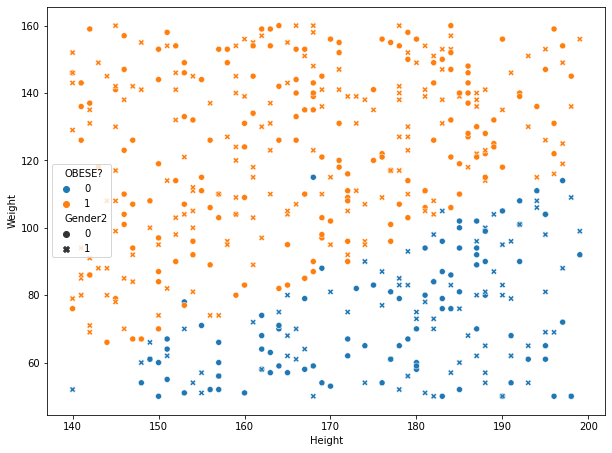

In [7]:
import seaborn as sns
sns.scatterplot(data = OBESE, x= 'Height', y= 'Weight', hue= 'OBESE?', style= 'Gender2' )

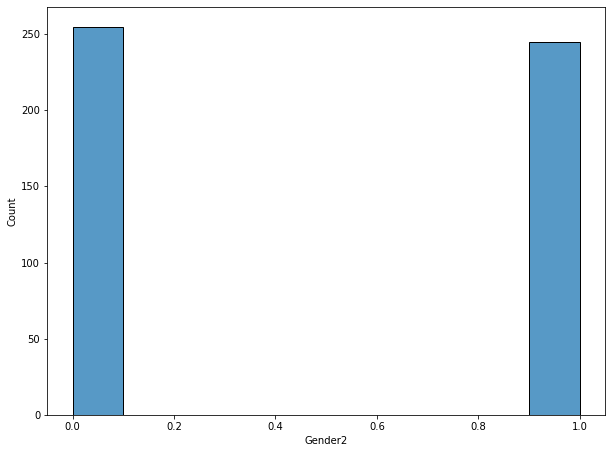

In [8]:
sns.histplot(data = OBESE, x= 'Gender2')

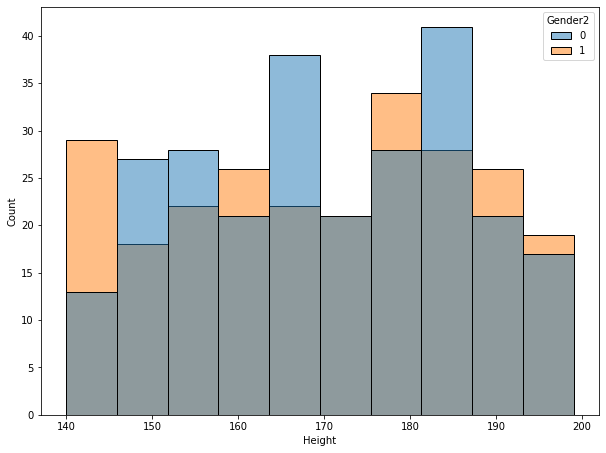

In [9]:
sns.histplot(data = OBESE, x= 'Height', hue= 'Gender2')

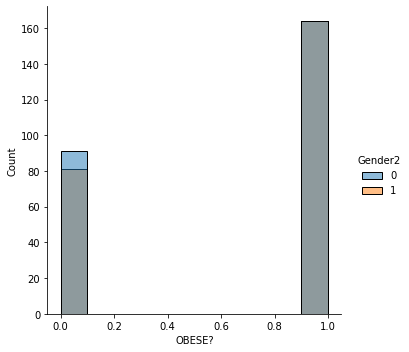

In [10]:
sns.displot(OBESE, x="OBESE?", hue="Gender2")

In [11]:
Xinput = OBESE.iloc[0:, 0:3]
Yinput = OBESE.iloc[0:, 3]
X_train, X_test, y_train, y_test = train_test_split(Xinput, Yinput, random_state= 2007)
print(f'Xtrain_shape: {X_train.shape}\nXtest_shape: {X_test.shape}\nYtrain_shape: {y_train.shape}\nytest_shape: {y_test.shape}')

Xtrain_shape: (375, 3)
Xtest_shape: (125, 3)
Ytrain_shape: (375,)
ytest_shape: (125,)


In [12]:
#I will be replacing the logistic regression error because MSE does not work well with that model. I prefer to use 
Models = [LogisticRegression(), svm.SVC(), RandomForestClassifier(n_estimators=100), xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)]
Model_names = ['Logistic_reg', 'SVM', 'RFC', 'XGB']
Confusion_dict = {}

for i, j in zip(Models, Model_names):
  current_mod = i
  i.fit(X_train, y_train)
  current_pred = i.predict(X_test)
  conf_matrix = confusion_matrix(y_test, current_pred)
  ROC = roc_auc_score(y_test, current_pred)  
  Confusion_dict[f'{j}'] = [conf_matrix, ROC]
  print(f'Model: {j}\nConfusion matrix:\n {conf_matrix}\nROC: {ROC}')


Model: Logistic_reg
Confusion matrix:
 [[41  1]
 [ 1 82]]
ROC: 0.9820711417096958
Model: SVM
Confusion matrix:
 [[41  1]
 [ 5 78]]
ROC: 0.9579747561675273
Model: RFC
Confusion matrix:
 [[39  3]
 [ 2 81]]
ROC: 0.9522375215146301
Model: XGB
Confusion matrix:
 [[41  1]
 [ 5 78]]
ROC: 0.9579747561675273


In [13]:
print(Confusion_dict)

{'Logistic_reg': [array([[41,  1],
       [ 1, 82]]), 0.9820711417096958], 'SVM': [array([[41,  1],
       [ 5, 78]]), 0.9579747561675273], 'RFC': [array([[39,  3],
       [ 2, 81]]), 0.9522375215146301], 'XGB': [array([[41,  1],
       [ 5, 78]]), 0.9579747561675273]}


Based on our confusion matrices, logistic regression seems to be our best model due to the fact that the false positive and negatives equate to the least in any other model. lets dig further into our logistic regression to explore other ways to measure accuracy. I would like to see the significance of certain attributes by checking out p values